<a href="https://colab.research.google.com/github/kukretinishtha/MachineLearning/blob/main/Multi_Naive_Bays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
### Loading required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
### Loading the dataset from drive
from google.colab import files
uploaded = files.upload()

Saving Telecom.csv to Telecom.csv


In [5]:
### Read the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['Telecom.csv']))
df.head()

,Gender,TT_gt_100,Response
0,F,Y,N
1,M,N,N
2,M,N,N
3,F,Y,Y
4,F,N,N


[[18  4]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.84      0.91      0.87        23

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

0.8666666666666667


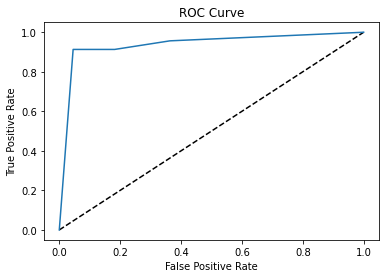

0.9377470355731224

In [6]:
dum_telecom = pd.get_dummies(df, drop_first=True)

X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

multinomial = MultinomialNB()
multinomial.fit(X_train, y_train) # Model Building

y_probs = multinomial.predict_proba(X_test)
y_pred = multinomial.predict(X_test) # Applying built on test data

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_probs = multinomial.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, y_pred_prob)